In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

df_m = pd.read_excel('./hair_dryer_reviews.xltx')

Setup Complete


In [2]:
frames=['marketplace','customer_id','review_id','product_parent']
df_m = df_m.drop(columns=frames)
index = df_m[(df_m['verified_purchase']=='N') | (df_m['verified_purchase']=='n')].index
df_m.drop(index, inplace=True)
index3 = df_m[(df_m['total_votes']==0) | (df_m['helpful_votes'] / df_m['total_votes'] < 0.5)].index
df_m = df_m.drop(index3)

In [3]:
# df_m.head(2)

In [4]:
df_m['star_rating'] = df_m['star_rating'].apply(lambda x: x/5)

In [5]:
# df_m.head(10)

In [6]:
def get_score(x):
    return x['star_rating']*0.3 + x['polarity']*0.7
df_m['score'] = df_m.apply(get_score, axis=1)

In [7]:
df_m['date1'] = pd.to_datetime(df_m['review_date'])
df_m['date2'] = df_m['date1'].dt.strftime('%m/%d/%Y')

In [8]:
df_m

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,score,date1,date2
13,B003FBG88E,conair pro styler ionic conditioning hair dryer,Beauty,0.6,1,1,N,Y,Everything okay but.....!!,I found everything goes well except the plug. ...,8/31/2015,-0.003621,0.184921,0.177465,2015-08-31,08/31/2015
17,B00CC7Y0G4,"remington d3015 ionic ceramic dryer, ionic hai...",Beauty,1.0,3,3,N,Y,"Works great, I use it 5 days a week","Reckon I have had this about a year now, at le...",8/30/2015,0.213889,0.466667,0.449722,2015-08-30,08/30/2015
20,B00A7JA72U,babyliss nano titanium portofino 6600 hair dry...,Beauty,0.4,1,1,N,Y,Great drier...........meh,Great product... Took me anywhere between 30-4...,8/30/2015,0.166942,0.598898,0.236860,2015-08-30,08/30/2015
44,B004INUY06,conair infiniti pro 1875 watt salon performanc...,Beauty,0.6,37,38,N,Y,This Conair Is Full of Air,Not as good as the original Conair 1875. Makeo...,8/27/2015,0.188159,0.451393,0.311711,2015-08-27,08/27/2015
46,B0009XH6V4,andis micro turbo hair dryer,Beauty,1.0,2,2,N,Y,"Petite, but Powerful Performance",This is the 2nd time I bought this little hair...,8/27/2015,0.047917,0.515833,0.333542,2015-08-27,08/27/2015
61,B000065DJY,revlon 1875w volumizing hair dryer,Beauty,0.4,1,1,N,Y,Diffuser made curls frizzy,The diffuser made my curly hair really frizzy ...,8/26/2015,0.000000,0.300000,0.120000,2015-08-26,08/26/2015
73,B00SKQFT4I,xtava allure 2200w professional ionic ceramic ...,Beauty,0.8,2,2,N,Y,Great Hairdryer,"Great Hairdryer, affordable price, delivery wa...",8/24/2015,0.199183,0.534641,0.379428,2015-08-24,08/24/2015
74,B00O0WRO08,conair 1875 watt cord keeper 2-in-1 hair dryer...,Beauty,0.8,1,1,N,Y,I love this hair dryer,I love this hair dryer; the available speeds a...,8/24/2015,0.309048,0.610000,0.456333,2015-08-24,08/24/2015
79,B0001B86HM,"conair pro styler bonnet hair dryer, white",Beauty,0.4,1,1,N,Y,Two Stars,blow holes are only at the top would be great ...,8/24/2015,0.433333,0.750000,0.423333,2015-08-24,08/24/2015
82,B000BBGS40,hot tools professional 800 watt ionic soft bon...,Beauty,1.0,13,16,N,Y,Hot Tools bonnet dryer is compact & good brand...,This is my third Hot Tools bonnet dryer in 25 ...,8/24/2015,0.158571,0.374762,0.411000,2015-08-24,08/24/2015


In [9]:
# import datetime
# df_m['year'] = pd.DatetimeIndex(df_m['review_date']).year
# df_m['month'] = pd.DatetimeIndex(df_m['review_date']).month
# df_m['day'] = pd.DatetimeIndex(df_m['review_date']).day

In [10]:
df_res = df_m.groupby('date2').agg(
    {'score': 'mean'}
)

In [14]:
df_res=df_res.reset_index()

In [15]:
import datetime
df_res['year'] = pd.DatetimeIndex(df_res['date2']).year
df = df_res.groupby('year').agg(
    {'score': 'mean'}
)

In [16]:
df=df.reset_index()

Text(0.5, 1.0, 'Hair Dryer')

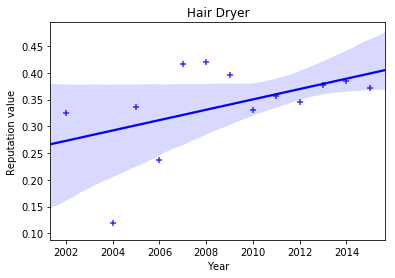

In [18]:
ax = sns.regplot(x='year', y='score', data=df, color='blue', marker='+')

ax.set(xlabel='Year', ylabel='Reputation value') # add x- and y-labels
ax.set_title('Hair Dryer') # add title

In [11]:
# df_res.index.dtype_str()

In [12]:
# sns.lineplot(data=df_res)

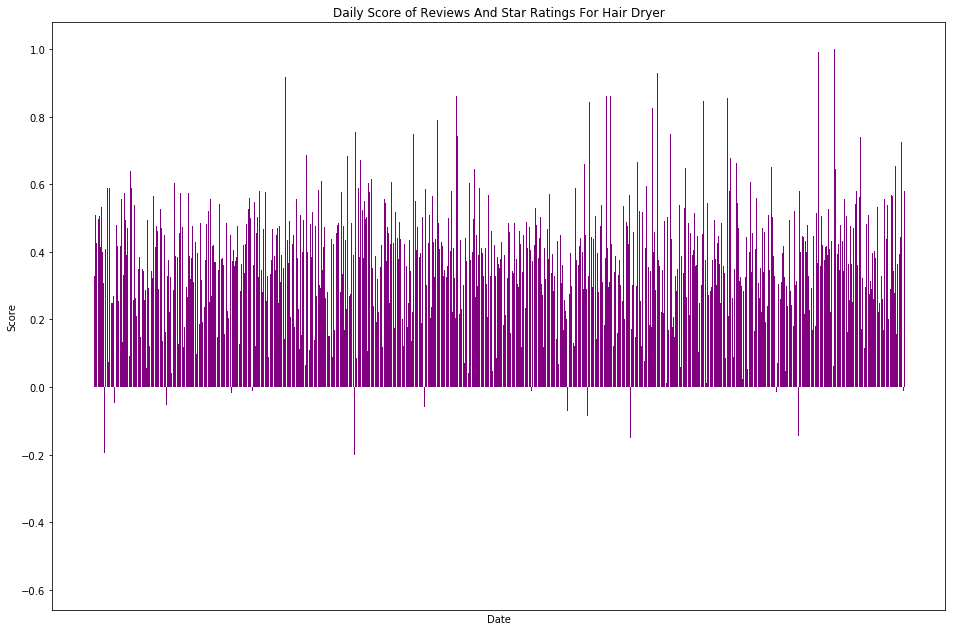

In [13]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(16, 12))

# Add x-axis and y-axis
ax.bar(df_res.index,
       df_res['score'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Score",
       title="Daily Score of Reviews And Star Ratings For Hair Dryer")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
fig.autofmt_xdate()

plt.show()